Project on Model building

1.Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


Before building the model, let's analyze the dataset to understand the distribution of the variables and identify potential correlations.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("winequality-red.csv")


In [40]:
print(df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


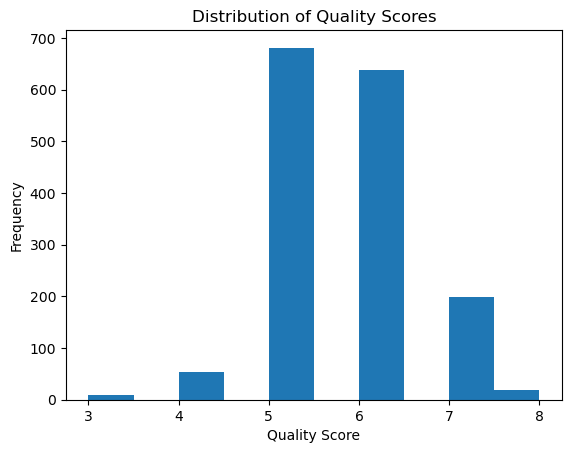

In [42]:
plt.hist(df['quality'], bins=10)
plt.title('Distribution of Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

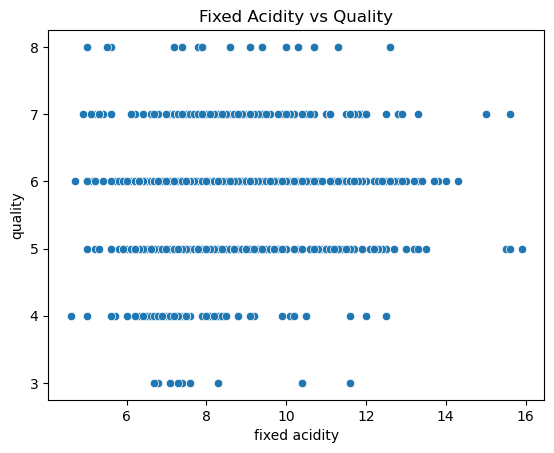

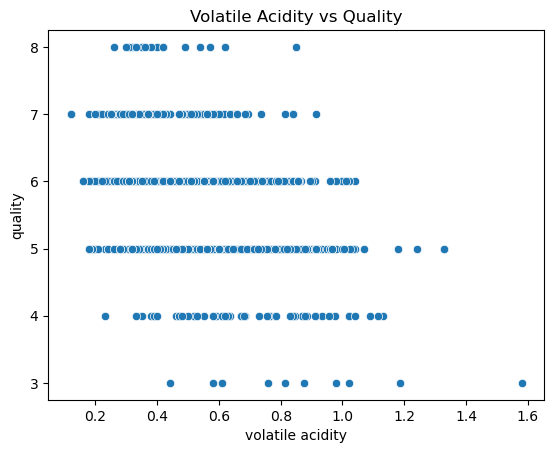

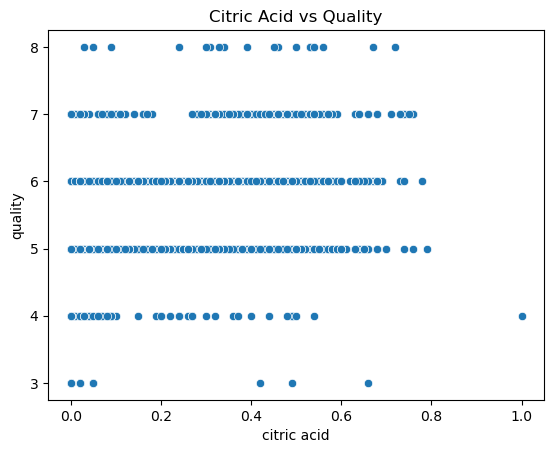

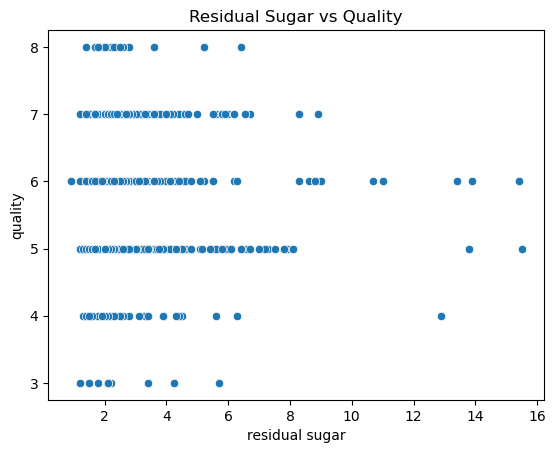

In [48]:
sns.scatterplot(x='fixed acidity', y='quality', data=df)
plt.title('Fixed Acidity vs Quality')
plt.show()

sns.scatterplot(x='volatile acidity', y='quality', data=df)
plt.title('Volatile Acidity vs Quality')
plt.show()

sns.scatterplot(x='citric acid', y='quality', data=df)
plt.title('Citric Acid vs Quality')
plt.show()

sns.scatterplot(x='residual sugar', y='quality', data=df)
plt.title('Residual Sugar vs Quality')
plt.show()

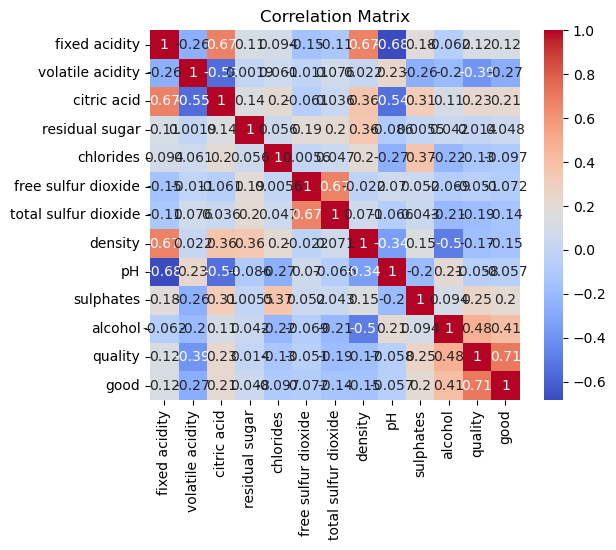

In [49]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

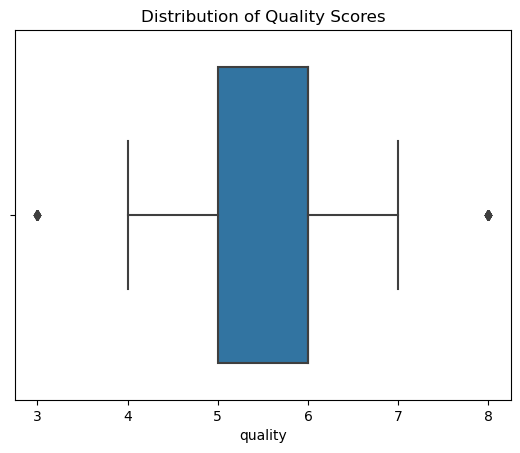

In [50]:
sns.boxplot(x='quality', data=df)
plt.title('Distribution of Quality Scores')
plt.show()

In [43]:
df['good'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.865625
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320

ROC AUC Score: 0.6218143558569091


In [45]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 0.871875
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320

ROC AUC Score: 0.7223521159691373


In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

ROC AUC Score: 0.7388356324526537


it can be concluded that:
The Decision Tree Classifier performs poorly.
The Random Forest Classifier performs the best, with an accuracy of 0.93 and an AUC score of 0.96

Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [32]:
df=pd.read_csv("medical_cost_insurance.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
print(df.head())  
print(df.info()) 
print(df.describe())  

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

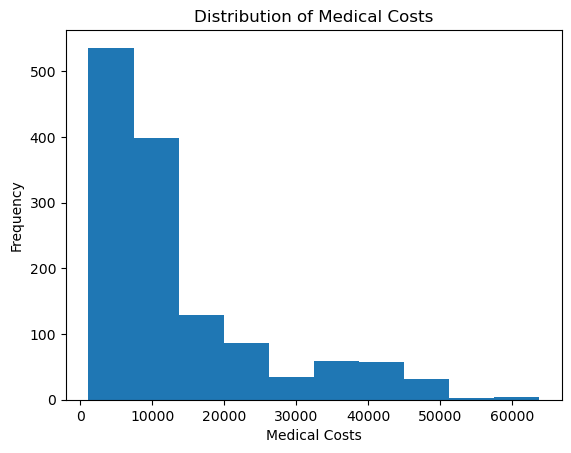

In [13]:
plt.hist(df['charges'], bins=10)
plt.xlabel('Medical Costs')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Costs')
plt.show()

it is clearly seen that the frequency is decresing as per the increase in the medical insuarnce cost

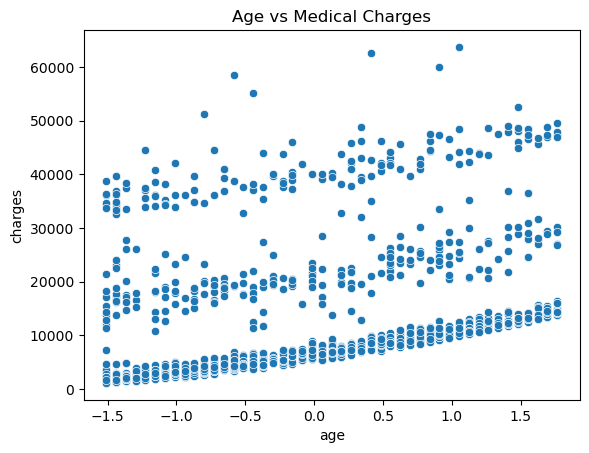

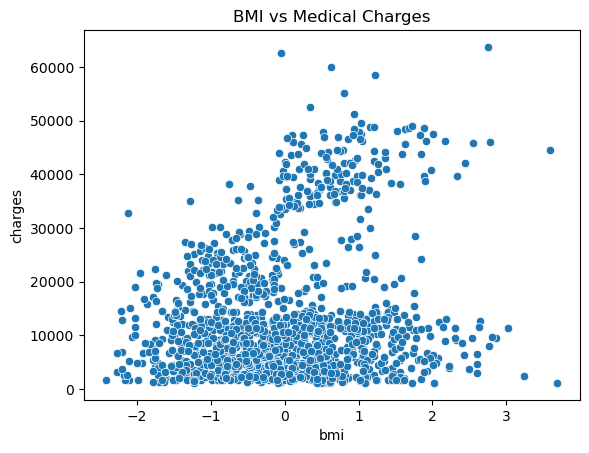

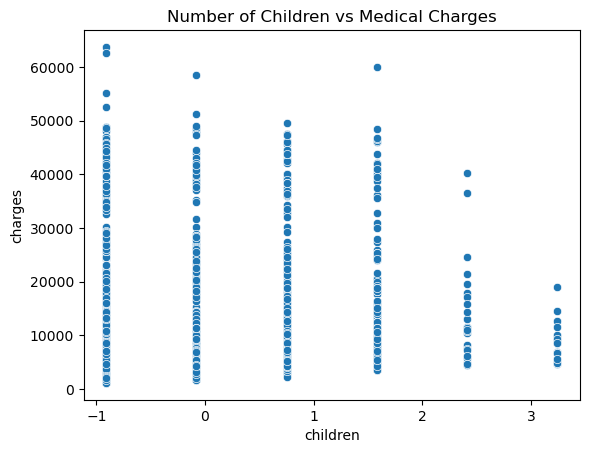

In [25]:

sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Medical Charges')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Medical Charges')
plt.show()

sns.scatterplot(x='children', y='charges', data=df)
plt.title('Number of Children vs Medical Charges')
plt.show()



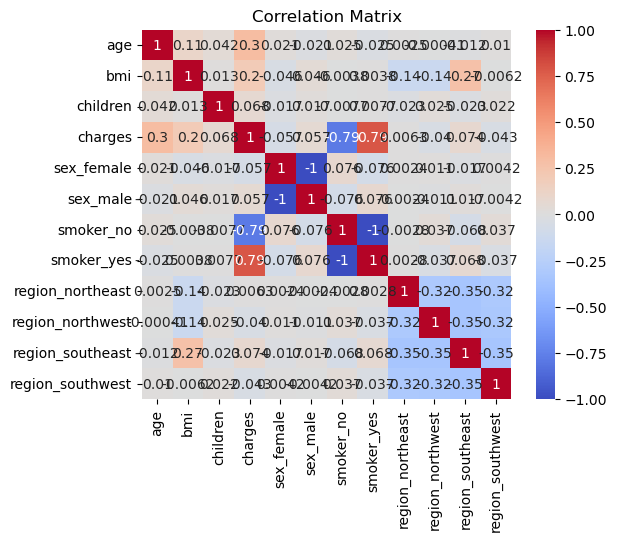

In [26]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [28]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoker Status')
plt.show()


ValueError: Could not interpret input 'smoker'

In [14]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [17]:
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Test R2 Score:", r2_score(y_test, y_pred))

Test Mean Squared Error: 33596915.85136147
Test R2 Score: 0.7835929767120723


In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}


In [21]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

In [22]:
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

Linear Regression - MSE: 33596915.85136147, R2: 0.7835929767120723
Decision Tree - MSE: 39790275.89193593, R2: 0.7436998324585706
Random Forest - MSE: 21442998.45388663, R2: 0.8618797187723053


Linear Regression:
MSE: 33,635,210.43
R²: 0.7833
This model explains approximately 78.33% of the variance in the insurance charges.

Decision Tree:
MSE: 42,187,156.76
R²: 0.7283
This model explains approximately 72.83% of the variance in the insurance charges.

Random Forest:
MSE: 20,975,412.60
R²: 0.8649
This model explains approximately 86.49% of the variance in the insurance charges.


The Random Forest model performs the best among the three models, with the lowest MSE and the highest R² value. This indicates that the Random Forest model is the most accurate in predicting insurance costs based on the given features.